In [1]:
%load_ext autoreload
%autoreload 2

import os
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

import seaborn as sns

from pysum.src.algorithm import blossum_from_counts

In [2]:
folder_path = 'output'

combined_counter = Counter()
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        with open(os.path.join(folder_path, filename), 'rb') as f:
            count_dict = pickle.load(f)
            combined_counter += Counter(count_dict)

print(combined_counter)

Counter({'RR': 908613, 'CC': 612746, 'VV': 519411, 'GG': 299991, 'NN': 288990, 'II': 167885, 'AA': 153536, 'FF': 153218, 'YY': 131813, 'WW': 119933, 'AV': 101808, 'VA': 101808, 'LL': 86878, 'HY': 66247, 'YH': 66247, 'RY': 50688, 'YR': 50688, 'KK': 48570, 'SV': 48117, 'VS': 48117, 'KV': 34331, 'VK': 34331, 'NR': 32582, 'RN': 32582, 'HH': 27028, 'FW': 25608, 'WF': 25608, 'KR': 23597, 'RK': 23597, 'SY': 23122, 'YS': 23122, 'LV': 22548, 'VL': 22548, 'KY': 22440, 'YK': 22440, 'HR': 19535, 'RH': 19535, 'SS': 19379, 'GW': 19269, 'WG': 19269, 'NY': 18172, 'YN': 18172, 'HN': 13874, 'NH': 13874, 'PP': 13171, 'RS': 11906, 'SR': 11906, 'RV': 11800, 'VR': 11800, 'AW': 10648, 'WA': 10648, 'TT': 9815, 'GS': 9743, 'SG': 9743, 'GV': 9649, 'VG': 9649, 'IV': 9516, 'VI': 9516, 'AS': 9043, 'SA': 9043, 'VW': 8990, 'WV': 8990, 'KS': 8896, 'SK': 8896, 'HV': 8718, 'VH': 8718, 'AL': 7528, 'LA': 7528, 'HS': 7467, 'SH': 7467, 'GR': 7194, 'RG': 7194, 'AK': 7180, 'KA': 7180, 'IL': 7143, 'LI': 7143, 'QV': 6796, 'VQ'

In [3]:
folder_path = 'output_standard'

combined_counter_std = Counter()
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        with open(os.path.join(folder_path, filename), 'rb') as f:
            count_dict = pickle.load(f)
            combined_counter_std += Counter(count_dict)

print(combined_counter_std)

Counter({'GG': 11499, 'CC': 11326, 'KK': 11152, 'LL': 9880, 'AA': 8441, 'II': 5595, 'VV': 5059, 'SS': 4947, 'PP': 4324, 'TT': 3483, 'FF': 3406, 'RR': 2617, 'IV': 2350, 'VI': 2350, 'NN': 2305, 'IL': 2304, 'LI': 2304, 'YY': 1824, 'LV': 1530, 'VL': 1530, 'ST': 1514, 'TS': 1514, 'EE': 1368, 'HH': 1357, 'AV': 1218, 'VA': 1218, 'FL': 1200, 'LF': 1200, 'KR': 1187, 'RK': 1187, 'DD': 1182, 'GS': 1073, 'SG': 1073, 'QQ': 979, 'FI': 843, 'IF': 843, 'AL': 831, 'LA': 831, 'AS': 798, 'SA': 798, 'AG': 772, 'GA': 772, 'NS': 695, 'SN': 695, 'KS': 685, 'SK': 685, 'AT': 671, 'TA': 671, 'KN': 651, 'NK': 651, 'WW': 625, 'MM': 623, 'LM': 559, 'ML': 559, 'KT': 552, 'TK': 552, 'AI': 534, 'FV': 534, 'IA': 534, 'VF': 534, 'DN': 512, 'ND': 512, 'KQ': 381, 'QK': 381, 'GR': 375, 'RG': 375, 'AK': 347, 'KA': 347, 'GN': 332, 'NG': 332, 'GK': 327, 'KG': 327, 'TV': 304, 'VT': 304, 'GT': 267, 'TG': 267, 'DS': 255, 'SD': 255, 'HK': 251, 'KH': 251, 'HR': 220, 'RH': 220, 'GV': 206, 'VG': 206, 'MV': 204, 'VM': 204, 'GL': 193

In [4]:
folder_path = 'output_camp_natural'

combined_counter_camp = Counter()
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        with open(os.path.join(folder_path, filename), 'rb') as f:
            count_dict = pickle.load(f)
            combined_counter_camp += Counter(count_dict)

print(combined_counter_camp)

Counter({'KK': 29123, 'LL': 27781, 'GG': 23782, 'AA': 23165, 'CC': 21117, 'II': 13469, 'SS': 11879, 'VV': 11227, 'TT': 9495, 'PP': 8463, 'FF': 7127, 'NN': 7112, 'IL': 6187, 'LI': 6187, 'RR': 4866, 'IV': 4417, 'VI': 4417, 'DD': 4170, 'LV': 3977, 'VL': 3977, 'FL': 3952, 'LF': 3952, 'EE': 3104, 'YY': 3033, 'AV': 2887, 'VA': 2887, 'KR': 2813, 'RK': 2813, 'ST': 2543, 'TS': 2543, 'QQ': 2497, 'GS': 2245, 'SG': 2245, 'HH': 2225, 'LM': 2033, 'ML': 2033, 'MM': 2023, 'FI': 1880, 'IF': 1880, 'AG': 1857, 'GA': 1857, 'KN': 1727, 'NK': 1727, 'AL': 1626, 'LA': 1626, 'WW': 1572, 'AT': 1482, 'TA': 1482, 'AS': 1472, 'SA': 1472, 'DN': 1464, 'ND': 1464, 'KS': 1237, 'SK': 1237, 'NS': 1143, 'SN': 1143, 'AI': 1065, 'IA': 1065, 'KT': 1037, 'TK': 1037, 'FV': 1016, 'VF': 1016, 'GN': 874, 'NG': 874, 'GK': 787, 'KG': 787, 'DS': 780, 'SD': 780, 'GV': 705, 'VG': 705, 'KL': 700, 'LK': 700, 'AK': 643, 'KA': 643, 'FS': 642, 'SF': 642, 'GT': 634, 'TG': 634, 'PS': 624, 'SP': 624, 'KQ': 599, 'QK': 599, 'AF': 559, 'FA': 55

In [5]:
folder_path = 'pos_blossum'

blossum_counter = Counter()
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        with open(os.path.join(folder_path, filename), 'rb') as f:
            count_dict = pickle.load(f)
            blossum_counter += Counter(count_dict)

print(blossum_counter)

Counter({'KK': 28960, 'LL': 28153, 'GG': 23840, 'AA': 23613, 'CC': 21280, 'II': 13521, 'SS': 12146, 'VV': 11162, 'TT': 9605, 'PP': 8278, 'NN': 7360, 'FF': 7179, 'IL': 6275, 'LI': 6275, 'RR': 4972, 'IV': 4374, 'VI': 4374, 'DD': 4303, 'FL': 4002, 'LF': 4002, 'LV': 3944, 'VL': 3944, 'YY': 3061, 'EE': 2944, 'AV': 2843, 'VA': 2843, 'KR': 2782, 'RK': 2782, 'ST': 2591, 'TS': 2591, 'QQ': 2539, 'HH': 2310, 'GS': 2256, 'SG': 2256, 'MM': 2108, 'LM': 2054, 'ML': 2054, 'FI': 1936, 'IF': 1936, 'AG': 1814, 'GA': 1814, 'KN': 1752, 'NK': 1752, 'AL': 1654, 'LA': 1654, 'AS': 1509, 'SA': 1509, 'WW': 1506, 'AT': 1492, 'TA': 1492, 'DN': 1445, 'ND': 1445, 'KS': 1267, 'SK': 1267, 'NS': 1198, 'SN': 1198, 'AI': 1082, 'IA': 1082, 'KT': 1054, 'TK': 1054, 'FV': 956, 'VF': 956, 'DS': 872, 'SD': 872, 'GN': 864, 'NG': 864, 'GK': 763, 'KG': 763, 'AK': 685, 'KA': 685, 'KL': 680, 'LK': 680, 'GV': 651, 'VG': 651, 'FS': 642, 'SF': 642, 'GT': 604, 'KQ': 604, 'QK': 604, 'TG': 604, 'AF': 558, 'FA': 558, 'PS': 554, 'SP': 554,

In [6]:
def fill_missing_combinations(data_dict, valid_letters):
    for pair in product(valid_letters, repeat=2):
        key = ''.join(pair)
        if key not in data_dict:
            data_dict[key] = 0
    return data_dict


In [7]:
single_letters = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [8]:
combined_counter_std = fill_missing_combinations(combined_counter_std, single_letters)
combined_counter_camp = fill_missing_combinations(combined_counter_camp, single_letters)
blossum_counter = fill_missing_combinations(blossum_counter, single_letters)

In [9]:
sorted_count_dict = dict(sorted(combined_counter.items()))

In [10]:
sorted_count_dict_std = dict(sorted(combined_counter_std.items()))

In [11]:
sorted_count_dict_camp = dict(sorted(combined_counter_camp.items()))

In [12]:
sorted_blossum_counter = dict(sorted(blossum_counter.items()))

In [13]:
len(sorted_count_dict)

400

In [14]:
len(sorted_count_dict_std)

400

In [15]:
len(sorted_count_dict_camp)

400

In [16]:
len(sorted_blossum_counter)

400

In [17]:
blossum_matrix = blossum_from_counts(sorted_count_dict)

In [18]:
blossum_matrix_std = blossum_from_counts(sorted_count_dict_std)

In [19]:
blossum_matrix_camp = blossum_from_counts(sorted_count_dict_camp)

In [20]:
blossum_matrix_blossum = blossum_from_counts(sorted_blossum_counter)

In [52]:
np.save('BLOSSUM/blossum_from_positives.npy', blossum_matrix)
np.save('BLOSSUM/blossum_from_standard.npy', blossum_matrix_std)
np.save('BLOSSUM/blossum_from_camp.npy', blossum_matrix_camp)
np.save('BLOSSUM/blossum_from_blossum.npy', blossum_matrix_blossum)

with open('FINAL_COUNTS/final_counts_positives.pkl', "wb") as f:
    pickle.dump(sorted_count_dict, f)

with open('FINAL_COUNTS/final_counts_standard.pkl', "wb") as f:
    pickle.dump(sorted_count_dict_std, f)

with open('FINAL_COUNTS/final_counts_camp.pkl', "wb") as f:
    pickle.dump(sorted_count_dict_camp, f)

with open('FINAL_COUNTS/final_counts_blossum.pkl', "wb") as f:
    pickle.dump(sorted_blossum_counter, f)

In [21]:
blossum_matrix_camp.shape

(20, 20)

In [22]:
sorted_count_dict.keys()

dict_keys(['AA', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AK', 'AL', 'AM', 'AN', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AV', 'AW', 'AY', 'CA', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CV', 'CW', 'CY', 'DA', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DK', 'DL', 'DM', 'DN', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DV', 'DW', 'DY', 'EA', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EK', 'EL', 'EM', 'EN', 'EP', 'EQ', 'ER', 'ES', 'ET', 'EV', 'EW', 'EY', 'FA', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FK', 'FL', 'FM', 'FN', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FV', 'FW', 'FY', 'GA', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GK', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GS', 'GT', 'GV', 'GW', 'GY', 'HA', 'HC', 'HD', 'HE', 'HF', 'HG', 'HH', 'HI', 'HK', 'HL', 'HM', 'HN', 'HP', 'HQ', 'HR', 'HS', 'HT', 'HV', 'HW', 'HY', 'IA', 'IC', 'ID', 'IE', 'IF', 'IG', 'IH', 'II', 'IK', 'IL', 'IM', 'IN', 'IP', 'IQ', 'IR', 'IS', 'IT', 'IV', 'IW', 'IY', 'KA', 'KC', 'KD', 'KE', 'KF',

In [23]:
keys = list(sorted_count_dict.keys())

# Extract all individual characters from keys
single_letters = sorted(set(''.join(keys)))

print(single_letters)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [24]:
def plot_heatmap(data_dict, valid_letters):
    # Filter data based on valid first and second letters
    filtered_data = {
        k: v for k, v in data_dict.items()
        if k[0] in valid_letters and k[1] in valid_letters
    }

    # Sort the valid letters for grid
    letters = sorted(valid_letters)
    size = len(letters)

    # Create 2D grid for values and labels
    heatmap = np.zeros((size, size))
    labels = np.empty((size, size), dtype=object)

    for i, row_letter in enumerate(letters):
        for j, col_letter in enumerate(letters):
            key = row_letter + col_letter
            value = filtered_data.get(key, 0)
            heatmap[i, j] = value
            labels[i, j] = f"{key}\n{value}"

    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(heatmap, cmap="YlOrRd")

    # Show all ticks and label them
    ax.set_xticks(np.arange(size))
    ax.set_yticks(np.arange(size))
    ax.set_xticklabels(letters)
    ax.set_yticklabels(letters)

    # Rotate the tick labels and set alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Annotate each cell with the key and value
    for i in range(size):
        for j in range(size):
            ax.text(j, i, labels[i, j], ha="center", va="center", color="black", fontsize=8)

    ax.set_title("Heatmap of Two-Letter Keys and Values")
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()


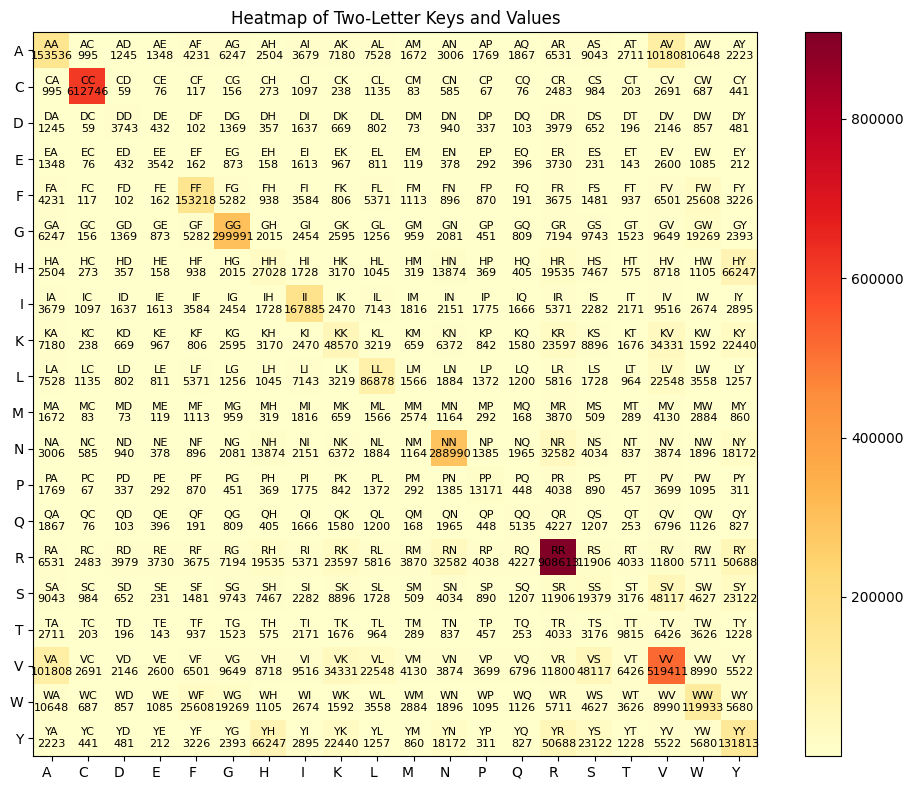

In [41]:
plot_heatmap(sorted_count_dict, single_letters)

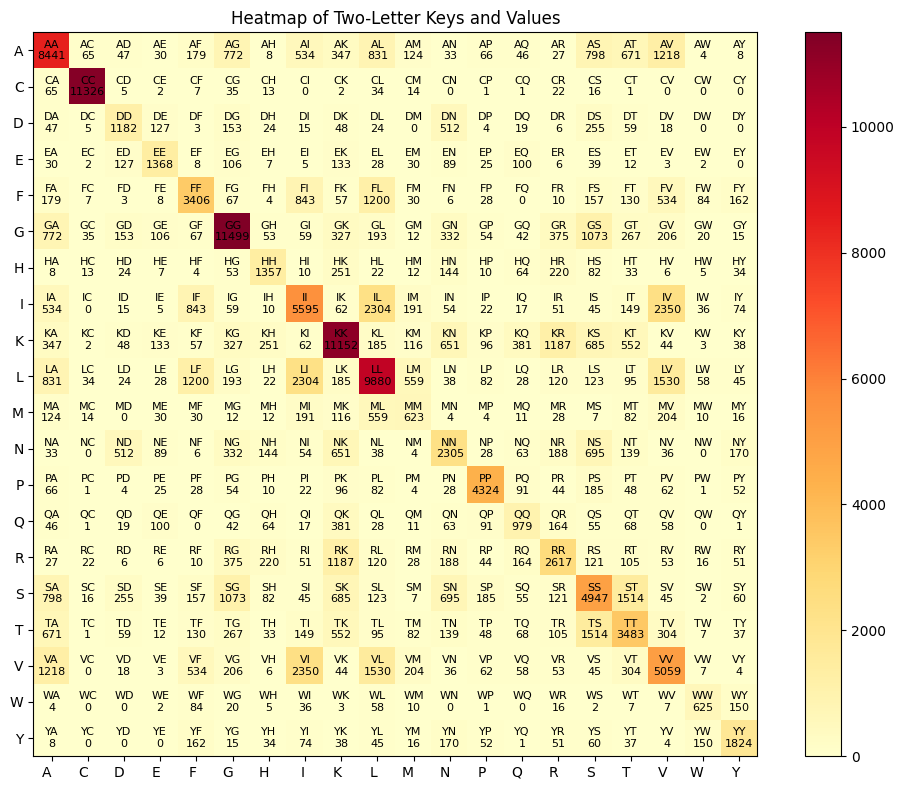

In [42]:
plot_heatmap(sorted_count_dict_std, single_letters)

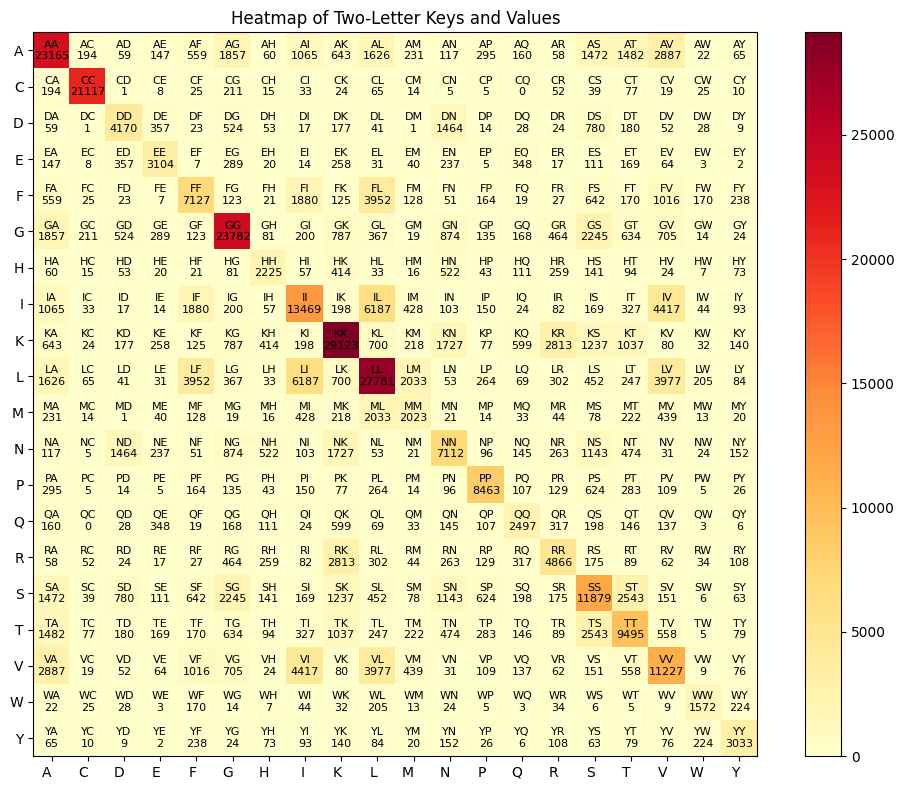

In [43]:
plot_heatmap(sorted_count_dict_camp, single_letters)

In [42]:
def plot_lower_triangle_matrix(matrix: np.ndarray, labels: list, title="Log-Odds Substitution Matrix"):
    matrix = np.array(matrix, dtype=float)
    assert matrix.shape[0] == matrix.shape[1] == len(labels), "Matrix and label length mismatch."

    finite_vals = matrix[np.isfinite(matrix)]
    vmin = np.min(finite_vals)
    vmax = np.max(finite_vals)

    plot_matrix = np.where(np.isneginf(matrix), vmin, matrix)

    annot_matrix = np.empty_like(matrix, dtype=object)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i, j]
            if np.isneginf(val):
                annot_matrix[i, j] = "-inf"
            elif np.isposinf(val):
                annot_matrix[i, j] = "+inf"
            elif np.isnan(val):
                annot_matrix[i, j] = ""
            else:
                annot_matrix[i, j] = str(int(round(val)))

    mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)

    df = pd.DataFrame(plot_matrix, index=labels, columns=labels)

    plt.figure(figsize=(6, 6))
    sns.heatmap(
        df, mask=mask, cmap="coolwarm", center=0,
        square=True, linewidths=0.5,
        annot=annot_matrix, fmt="",
        cbar_kws={"label": "Log-Odds Score", "shrink": 0.75},  # smaller bar
        annot_kws={"fontsize": 8},
        vmin=vmin, vmax=vmax
    )

    plt.title(title, fontsize=10)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


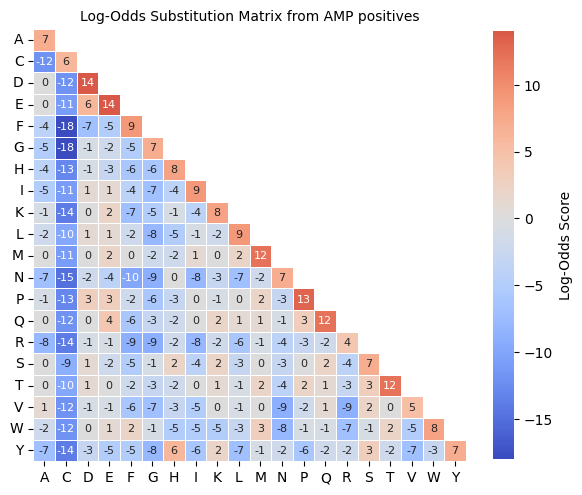

In [43]:
plot_lower_triangle_matrix(blossum_matrix, single_letters, title="Log-Odds Substitution Matrix from AMP positives")

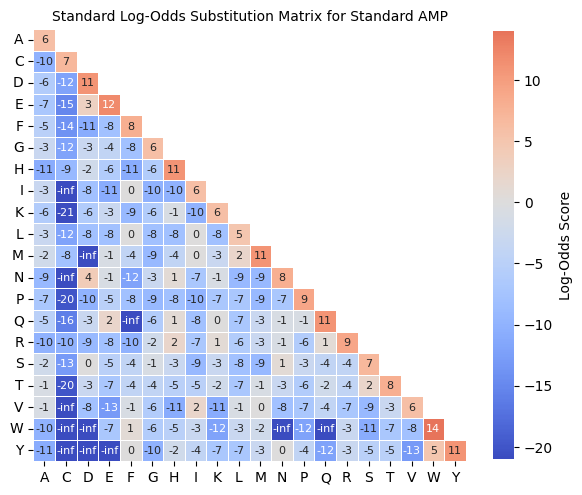

In [44]:
plot_lower_triangle_matrix(blossum_matrix_std, single_letters, title="Standard Log-Odds Substitution Matrix for Standard AMP")

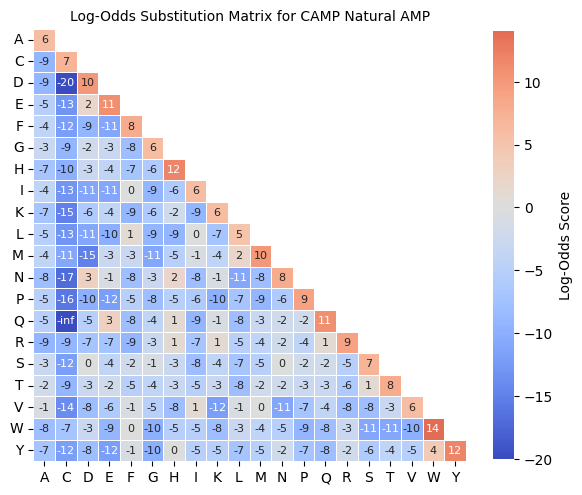

In [45]:
plot_lower_triangle_matrix(blossum_matrix_camp, single_letters, title="Log-Odds Substitution Matrix for CAMP Natural AMP")

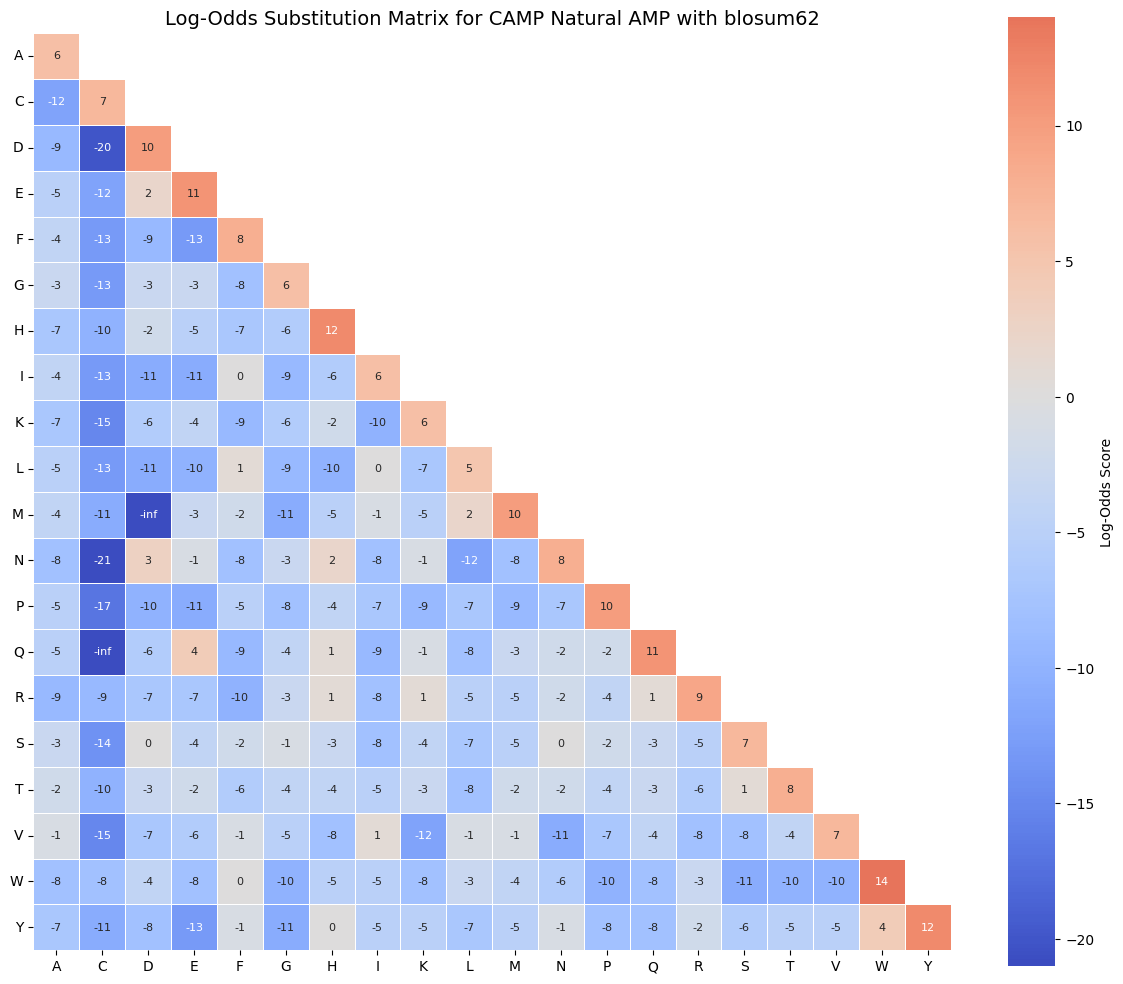

In [48]:
plot_lower_triangle_matrix(blossum_matrix_blossum, single_letters, title="Log-Odds Substitution Matrix for CAMP Natural AMP with blosum62")

In [50]:
blossum_matrix_blossum

array([['6', '-12', '-9', '-5', '-4', '-3', '-7', '-4', '-7', '-5', '-4',
        '-8', '-5', '-5', '-9', '-3', '-2', '-1', '-8', '-7'],
       ['-12', '7', '-20', '-12', '-13', '-13', '-10', '-13', '-15',
        '-13', '-11', '-21', '-17', '-inf', '-9', '-14', '-10', '-15',
        '-8', '-11'],
       ['-9', '-20', '10', '2', '-9', '-3', '-2', '-11', '-6', '-11',
        '-inf', '3', '-10', '-6', '-7', '0', '-3', '-7', '-4', '-8'],
       ['-5', '-12', '2', '11', '-13', '-3', '-5', '-11', '-4', '-10',
        '-3', '-1', '-11', '4', '-7', '-4', '-2', '-6', '-8', '-13'],
       ['-4', '-13', '-9', '-13', '8', '-8', '-7', '0', '-9', '1', '-2',
        '-8', '-5', '-9', '-10', '-2', '-6', '-1', '0', '-1'],
       ['-3', '-13', '-3', '-3', '-8', '6', '-6', '-9', '-6', '-9',
        '-11', '-3', '-8', '-4', '-3', '-1', '-4', '-5', '-10', '-11'],
       ['-7', '-10', '-2', '-5', '-7', '-6', '12', '-6', '-2', '-10',
        '-5', '2', '-4', '1', '1', '-3', '-4', '-8', '-5', '0'],
       ['

In [49]:
plot_lower_triangle_matrix(blossum_matrix_blossum - blossum_matrix_camp, single_letters, title="Diff")

TypeError: unsupported operand type(s) for -: 'str' and 'str'